# Patterns in Renewable Energy Generation

<img src="images/energy.jpg"/>

The use of coal in the United States peaked in 2005, and since then has decreased by 25%, being replaced by renewable energy sources and more efficient use (Lovins, 2014). As the United States pursues a portfolio of more diverse, sustainable and secure energy sources, there are many questions to consider. What are effective factors in incentivizing states to adopt more environmentally friendly energy generation methods? How do these factors vary by state? How can we direct resources to different places in the country and ensure that they effectively drive renewable energy sources adoption? To derive insights and answer these questions, we take a combination of generation, usage, and greenhouse emission data by state and combine it with macro-economic and political information.

For this problem, we gathered data from various sources to include the following information for each state within the U.S. for the years spanning year 2000 to year 2013. The aggregated dataset energy.csv results in a total of 27 variables and 699 observations. Each observation contains one record per state per year. Here's a detailed description of the variables:

    GenTotal: Annual generation of energy using all types of energy sources (coal, nuclear, hydroelectric, solar, etc.) normalized by the state population at a given year.

    GenTotalRenewable: Annual generation of energy using all renewable energy sources normalized by the state population at a given year.

    GenHydro, GenSolar: Annual generation of energy using each type of energy source as a percent of the total energy generation.

    GenTotalRenewableBinary, GenSolarBinary: 1 if generation from solar or other renewable energy sources increased between a year n and a year n+1. 0 if it did not increase.

    AllSourcesCO2, AllSourcesSO2 and AllSourcesNOx: Annual emissions per state in metric tons, normalized by the respective state population at a given year and caused by all energy generation sources.

    EPriceResidential, EPriceCommercial, EPriceIndustrial, EPriceTransportation, EPriceTotal: Average electricity price per state, per sector (residential, industrial, commercial, etc.)

    ESalesResidential, ESalesCommercial, ESalesIndustrial, ESalesTransportation, ESalesTotal: Annual normalized sales of electricity per state, per sector.

    CumlRegulatory, CumlFinancial: Number of energy-related financial incentives and regulations created by a state per year.

    Demographic data such as annual wages per capita and presidential results (0 if a state voted republican, 1 is democrat).

### Problem 1 - Total Renewable Energy Generation
Load energy.csv into a data frame called energy.

Renewable energy sources are considered to include geothermal, hydroelectric, biomass, solar and wind.

In [1]:
# Load the Dataset

energy = read.csv("data/energy.csv")

head(energy)

,STATE,YEAR,GenTotal,GenHydro,GenSolar,GenTotalRenewable,GenSolarBinary,GenTotalRenewableBinary,AllSourcesCO2,AllSourcesSO2,⋯,EsalesCommercial,EsalesIndustrial,EsalesTransportation,EsalesOther,EsalesTotal,CumlFinancial,CumlRegulatory,Total.salary,presidential.results,Import
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>
1,AK,2000,9.807319,0.1627248,0,0.1627248,0,1,7.260627,0.022395930,⋯,0.4211845,0.1952228,0,0.03425594,8.458761,1,1,17.64609,0,0
2,AK,2001,10.644612,0.1995421,0,0.1996829,0,1,7.311767,0.011925094,⋯,0.4196878,0.1979111,0,0.03560234,8.608923,1,1,18.69197,0,0
3,AK,2002,10.541432,0.2126913,0,0.2143351,0,1,6.938342,0.011477100,⋯,0.4095216,0.1990407,0,0.03790713,8.513568,1,1,19.64402,0,0
4,AK,2003,9.786963,0.2496613,0,0.2504531,0,0,6.153593,0.006750341,⋯,0.4444949,0.1983659,0,0.00000000,8.590290,1,1,20.39238,0,0
5,AK,2004,9.899390,0.2295212,0,0.2308738,0,0,7.246256,0.006591790,⋯,0.4492727,0.1945192,0,0.00000000,8.779676,1,1,21.44678,0,0
6,AK,2005,9.858374,0.2225966,0,0.2234271,0,0,6.541566,0.006048441,⋯,0.4557934,0.1955170,0,NA,8.862909,2,1,22.71282,0,0


In [2]:
str(energy)

'data.frame':	699 obs. of  27 variables:
 $ STATE                  : Factor w/ 50 levels "AK","AL","AR",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ YEAR                   : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ GenTotal               : num  9.81 10.64 10.54 9.79 9.9 ...
 $ GenHydro               : num  0.163 0.2 0.213 0.25 0.23 ...
 $ GenSolar               : num  0 0 0 0 0 0 0 0 0 0 ...
 $ GenTotalRenewable      : num  0.163 0.2 0.214 0.25 0.231 ...
 $ GenSolarBinary         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ GenTotalRenewableBinary: int  1 1 1 0 0 0 1 0 1 1 ...
 $ AllSourcesCO2          : num  7.26 7.31 6.94 6.15 7.25 ...
 $ AllSourcesSO2          : num  0.0224 0.01193 0.01148 0.00675 0.00659 ...
 $ AllSourcesNOx          : num  0.0289 0.0277 0.0294 0.0242 0.0377 ...
 $ EPriceResidential      : num  11.4 12.1 12.1 12 12.4 ...
 $ EPriceCommercial       : num  9.77 10.29 10.13 10.49 10.99 ...
 $ EPriceIndustrial       : num  7.56 7.61 7.65 7.86 8.33 ...
 $ EPriceTransportatio

In [3]:
summary(energy)

     STATE          YEAR         GenTotal         GenHydro      
 AK     : 14   Min.   :2000   Min.   : 4.591   Min.   :0.00000  
 AL     : 14   1st Qu.:2003   1st Qu.:10.037   1st Qu.:0.00888  
 AR     : 14   Median :2006   Median :14.647   Median :0.02291  
 AZ     : 14   Mean   :2006   Mean   :16.956   Mean   :0.09853  
 CA     : 14   3rd Qu.:2010   3rd Qu.:18.018   3rd Qu.:0.07041  
 CO     : 14   Max.   :2013   Max.   :92.097   Max.   :0.92076  
 (Other):615                                                    
    GenSolar          GenTotalRenewable GenSolarBinary  
 Min.   :-1.300e-08   Min.   :0.00000   Min.   :0.0000  
 1st Qu.: 0.000e+00   1st Qu.:0.02027   1st Qu.:0.0000  
 Median : 0.000e+00   Median :0.04475   Median :0.0000  
 Mean   : 3.344e-04   Mean   :0.12245   Mean   :0.2318  
 3rd Qu.: 0.000e+00   3rd Qu.:0.10771   3rd Qu.:0.0000  
 Max.   : 2.045e-02   Max.   :0.92076   Max.   :1.0000  
                                                        
 GenTotalRenewableBinary

**Which state in the United States seems to have the highest total generation of energy from renewable sources (use the variable GenTotalRenewable)?**

In [4]:
max(energy$GenTotalRenewable)

[1] 0.9207631

In [5]:
which(energy$GenTotalRenewable == max(energy$GenTotalRenewable))

[1] 169

In [6]:
energy[169,]

,STATE,YEAR,GenTotal,GenHydro,GenSolar,GenTotalRenewable,GenSolarBinary,GenTotalRenewableBinary,AllSourcesCO2,AllSourcesSO2,⋯,EsalesCommercial,EsalesIndustrial,EsalesTransportation,EsalesOther,EsalesTotal,CumlFinancial,CumlRegulatory,Total.salary,presidential.results,Import
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>
169,ID,2000,9.165016,0.9207631,0,0.9207631,0,0,0.6368657,0.004590802,⋯,0.3095307,0.368208,0,0.01541804,17.57071,2,2,12.81243,0,1


Answer: Idaho (ID).

**Which year did the above state produce the highest energy generation from renewable resources?**

Answer: 2000.

### Problem 2 - Relationship Between Politics and Greenhouse Emissions
What is the average CO2 emissions from all sources of energy for:

**states during years in which they voted republican?**

In [7]:
republicanset = subset(energy, presidential.results == 0)

head(republicanset)

,STATE,YEAR,GenTotal,GenHydro,GenSolar,GenTotalRenewable,GenSolarBinary,GenTotalRenewableBinary,AllSourcesCO2,AllSourcesSO2,⋯,EsalesCommercial,EsalesIndustrial,EsalesTransportation,EsalesOther,EsalesTotal,CumlFinancial,CumlRegulatory,Total.salary,presidential.results,Import
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>
1,AK,2000,9.807319,0.1627248,0,0.1627248,0,1,7.260627,0.022395930,⋯,0.4211845,0.1952228,0,0.03425594,8.458761,1,1,17.64609,0,0
2,AK,2001,10.644612,0.1995421,0,0.1996829,0,1,7.311767,0.011925094,⋯,0.4196878,0.1979111,0,0.03560234,8.608923,1,1,18.69197,0,0
3,AK,2002,10.541432,0.2126913,0,0.2143351,0,1,6.938342,0.011477100,⋯,0.4095216,0.1990407,0,0.03790713,8.513568,1,1,19.64402,0,0
4,AK,2003,9.786963,0.2496613,0,0.2504531,0,0,6.153593,0.006750341,⋯,0.4444949,0.1983659,0,0.00000000,8.590290,1,1,20.39238,0,0
5,AK,2004,9.899390,0.2295212,0,0.2308738,0,0,7.246256,0.006591790,⋯,0.4492727,0.1945192,0,0.00000000,8.779676,1,1,21.44678,0,0
6,AK,2005,9.858374,0.2225966,0,0.2234271,0,0,6.541566,0.006048441,⋯,0.4557934,0.1955170,0,NA,8.862909,2,1,22.71282,0,0


In [8]:
summary(republicanset$AllSourcesCO2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.5208  8.6963 11.6262 16.4430 14.8901 93.9643      24 

In [9]:
mean(republicanset$AllSourcesCO2, na.rm = TRUE)

[1] 16.44296

Answer: 16.44 tons/year.

**States during years in which they voted democrat?**

In [10]:
democraticset = subset(energy, presidential.results == 1)

summary(democraticset$AllSourcesCO2)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
 0.01059  2.61123  5.42616  5.78378  7.76743 19.51903       26 

In [11]:
mean(democraticset$AllSourcesCO2, na.rm = TRUE)

[1] 5.783781

Answer: 5.78 tons/year.

**States that voted democrat have on average higher NOx emissions than states that voted republican across all years. Is this statement true or false?**

In [12]:
repnox = mean(republicanset$AllSourcesNOx, na.rm = TRUE)

demnox = mean(democraticset$AllSourcesNOx, na.rm = TRUE)

paste("Average NOX in Republican States:", round(repnox,2))

paste("Average NOX in Democratic States:", round(demnox,2))

[1] "Average NOX in Republican States: 0.03"

[1] "Average NOX in Democratic States: 0.01"

Answer: False.

### Problem 3 - Relationship Between Greenhouse Emissions and Energy Sales
**What is the correlation between overall CO2 emissions and energy sales made to industrial facilities?** Note that the variables AllSourcesCO2 and EsalesIndustrial contain NAs. Use the parameter: use="complete" to handle NAs in this question.

In [13]:
round(cor(energy$AllSourcesCO2, energy$EsalesIndustrial, use='complete'),4)

[1] 0.5386

In [14]:
round(cor(energy$AllSourcesCO2, energy$EsalesResidential, use='complete'),4)

[1] -0.5183

In [15]:
round(cor(energy$AllSourcesCO2, energy$EsalesCommercial, use='complete'),4)

[1] -0.3734

### Problem 4 - Boxplot of Energy Prices per State
Create a boxplot of the total energy price (EPriceTotal) by State across the data, and a table summarizing the mean of EPriceTotal by State.

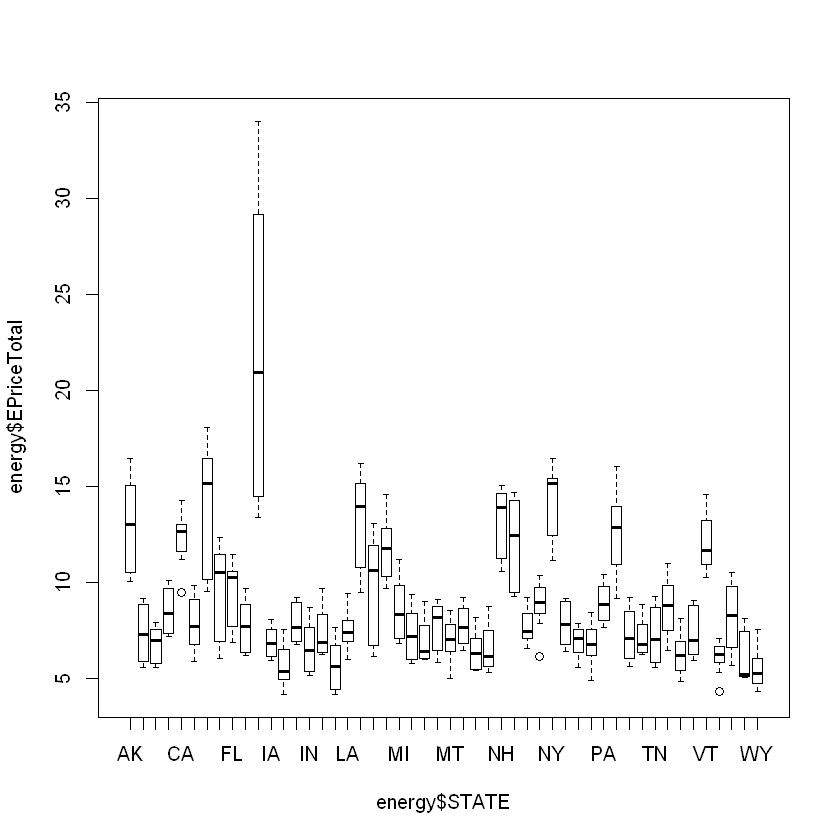

In [16]:
boxplot(energy$EPriceTotal ~ energy$STATE)

In [17]:
sort(tapply(energy$EPriceTotal, energy$STATE, mean))

WY        KY        ID        WV        WA        UT        ND        NE 
 5.510000  5.688571  5.689286  6.048571  6.157143  6.298571  6.431429  6.579286 
       IN        AR        OR        IA        MO        OK        MT        SD 
 6.644286  6.739286  6.849286  6.884286  6.934286  6.957143  7.048571  7.118571 
       MN        SC        TN        KS        AL        VA        LA        NC 
 7.298571  7.307143  7.312857  7.395714  7.399286  7.440000  7.509286  7.737857 
       NM        MS        CO        GA        OH        IL        WI        AZ 
 7.753571  7.759286  7.810000  7.846429  7.858571  7.861429  8.202857  8.507857 
       MI        TX        NV        PA        FL        DE        MD        ME 
 8.547143  8.709286  8.919286  8.941429  9.385000  9.536429  9.741429 11.645714 
       NJ        VT        CA        RI        NH        MA        AK        CT 
12.071429 12.094286 12.347143 12.511429 13.081429 13.112143 13.135714 13.815000 
       NY        HI 
14.165714 21.885714

**What observations do you make?**

Answer: Hawaii (HI) has the most expensive energy price.

**Which state has the lowest average energy price of all?**

Answer: Wyoming (WY).

**Is this state associated with the highest mean total energy generation (GenTotal)?**

In [18]:
sort(tapply(energy$GenTotal, energy$STATE, mean))

CA        MA        RI        NJ        NY        DE        MD        ID 
 5.576285  6.434295  6.488628  7.108700  7.197383  8.256761  8.352530  8.358471 
       HI        CT        VA        AK        VT        MN        CO        SD 
 8.623563  9.358409  9.720367  9.810218 10.177005 10.199283 10.367634 10.719863 
       WI        MI        FL        OH        ME        NC        GA        NV 
11.079302 11.201083 12.027089 12.664461 13.148792 13.915444 13.969187 14.311625 
       OR        TN        MO        IL        UT        NH        IA        MS 
14.537263 14.751132 15.062760 15.193858 15.587630 15.671056 16.270149 16.377409 
       WA        KS        TX        AZ        PA        NM        NE        OK 
16.426394 16.732968 17.020082 17.211604 17.326080 18.130563 18.470352 18.787146 
       AR        IN        LA        KY        SC        MT        AL        WV 
19.090133 19.664150 21.384516 22.399999 22.476570 28.942351 30.582000 47.417141 
       ND        WY 
49.909462 88.393083

Answer: Wyoming (WY).

### Problem 5 - Prediction Model for Solar Generation
We are interested in predicting whether states are going to increase their solar energy generation over the next year. Let's subset our dataset into a training and a testing set by using the following commands:

    set.seed(144)

    spl = sample(1:nrow(energy), size = 0.7*nrow(energy))

    train = energy[spl,]

    test = energy[-spl,]

Let's build now a logistic regression model "mod" using the train set to predict the binary variable GenSolarBinary. To do so, we consider the following as potential predictive variables: GenHydro, GenSolar, CumlFinancial, CumlRegulatory, Total.salary, Import.

In [19]:
library(caTools)

In [20]:
# Split the Data

set.seed(144)

spl = sample(1:nrow(energy), size=0.7 * nrow(energy))

train = energy[spl,]
test = energy[-spl,]

In [21]:
head(train)

,STATE,YEAR,GenTotal,GenHydro,GenSolar,GenTotalRenewable,GenSolarBinary,GenTotalRenewableBinary,AllSourcesCO2,AllSourcesSO2,⋯,EsalesCommercial,EsalesIndustrial,EsalesTransportation,EsalesOther,EsalesTotal,CumlFinancial,CumlRegulatory,Total.salary,presidential.results,Import
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>
167,IA,2012,18.425423,0.013518933,0.00000000,0.263776082,0,1,13.416078,0.031173611,⋯,0.2671198,0.4268665,0.000000000,NA,14.860229,51,11,21.24970,1,0
251,LA,2012,22.456776,0.006575371,0.00000000,0.007191979,0,1,13.069596,0.023427361,⋯,0.2861386,0.3593600,0.000124937,NA,18.400750,11,8,19.96499,0,0
520,PA,2001,15.985766,0.008393695,0.00000000,0.015004147,0,1,9.214357,0.079670963,⋯,0.2997863,0.3502820,0.000000000,0.009654287,11.000422,0,3,16.39322,1,0
65,CA,2008,5.692272,0.116007864,0.00322371,0.218421295,0,1,1.711877,0.000105096,⋯,0.4662461,0.1903050,0.003232508,NA,7.339076,108,26,24.79641,1,1
347,MS,2010,18.404954,0.000000000,0.00000000,0.000018200,0,1,9.067929,0.019943813,⋯,0.2778376,0.3161255,0.000000000,NA,16.783557,19,1,14.45173,0,0
320,MN,2011,9.932630,0.014046445,0.00000000,0.158208553,0,1,6.099099,0.009809021,⋯,0.3264297,0.3446343,0.000279399,NA,12.814556,118,12,26.17097,1,1


In [22]:
# Create a Logistic Regression Model

mod = glm(GenSolarBinary ~ GenHydro + GenSolar + CumlFinancial + CumlRegulatory + Total.salary + Import, data=train,
          family='binomial')

summary(mod)


Call:
glm(formula = GenSolarBinary ~ GenHydro + GenSolar + CumlFinancial + 
    CumlRegulatory + Total.salary + Import, family = "binomial", 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6707  -0.4959  -0.2899  -0.0734   2.7436  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -5.581159   0.827827  -6.742 1.56e-11 ***
GenHydro        -3.377881   1.010639  -3.342 0.000831 ***
GenSolar       860.165947 280.389543   3.068 0.002157 ** 
CumlFinancial    0.025375   0.008565   2.963 0.003050 ** 
CumlRegulatory   0.169151   0.045550   3.714 0.000204 ***
Total.salary     0.123684   0.040991   3.017 0.002550 ** 
Import          -0.269544   0.322326  -0.836 0.403017    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 535.80  on 488  degrees of freedom
Residual deviance: 325.67  on 482  degrees of freedom
AIC: 339.67


**Which variable is most predictive in the model?**

Answer: CumlRegulatory.

### Problem 6 - Performance on the Test Set
Compute the predictions on the test set. Using a threshold of 0.5, **what is the accuracy of our model on the test set?**

In [23]:
# Make Predictions on the Test set
predLR = predict(mod, newdata = test, type='response')

cmLR = table(test$GenSolarBinary, predLR > 0.5)
cmLR

   
    FALSE TRUE
  0   159    5
  1    20   26

The rows are labeled with the actual outcome, and the columns are labeled with the predicted outcome.

                      Predict 0       Predict 1
        Actual 0    True Negative   False Positive
        Actual 1    False Negative  True Positive

        cmLR = [1][3]
               [2][4]

In [24]:
# Compute Logistic Regression Accuracy
accurLR = sum(diag(cmLR))/sum(cmLR)
paste("Accuracy Logistic Regression:", round(accurLR,digits=4))

[1] "Accuracy Logistic Regression: 0.881"

**What is the accuracy for states voting republican?**

In [25]:
republicantest = subset(test, presidential.results == 0)

In [26]:
# Make Predictions with Republicans
predRT = predict(mod, newdata = republicantest, type='response')

cmRT = table(republicantest$GenSolarBinary, predRT > 0.5)
cmRT

   
    FALSE TRUE
  0   105    1
  1    12    2

In [27]:
# Compute Logistic Regression Accuracy
accurRT = sum(diag(cmRT))/sum(cmRT)
paste("Accuracy Logistic Regression for Republicans:", round(accurRT,digits=4))

[1] "Accuracy Logistic Regression for Republicans: 0.8917"

**What is the accuracy for states voting democrat?**

In [28]:
democratictest = subset(test, presidential.results == 1)

In [29]:
# Make Predictions with Democrats
predDT = predict(mod, newdata = democratictest, type='response')

cmDT = table(democratictest$GenSolarBinary, predDT > 0.5)
cmDT

   
    FALSE TRUE
  0    54    4
  1     8   24

In [30]:
# Compute Logistic Regression Accuracy
accurDT = sum(diag(cmDT))/sum(cmDT)
paste("Accuracy Logistic Regression for Democrats:", round(accurDT,digits=4))

[1] "Accuracy Logistic Regression for Democrats: 0.8667"

### Problem 7 - Clustering of the Observations
We can perhaps improve our accuracy if we implement a cluster-the-predict approach. We are interested in clustering the observations based on information about the regulatory and financial incentives, the elections outcome and the population wealth in each state across the years, in addition to whether the state was an energy importer or not.

Let us create a train.limited and test.limited datasets, where we only keep the variables CumlRegulatory, CumlFinancial, presidential.results, Total.salary, and Import.

Using the "preProcess" function on the train.limited set, we can compute the train.norm and test.norm.

In [31]:
# Limite the variables

train.limited = train[,c('CumlRegulatory', 'CumlFinancial', 'presidential.results', 'Total.salary', 'Import')]

test.limited = test[,c('CumlRegulatory', 'CumlFinancial', 'presidential.results', 'Total.salary', 'Import')]

In [32]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



In [33]:
# Normalizing the data

preproc = preProcess(train.limited)

train.norm = predict(preproc, train.limited)
test.norm = predict(preproc, test.limited)

**Why didn't we include the dependent variable GenSolarBinary in this clustering phase?**

Answer: We don't want create a cluster using the dependent variable. GenSolarBinary is the result that we want to find.

Let's use kmeans clustering for this problem with a seed of 144, k=2 and keep the maximum number of iterations at 1,000.

Using the flexclust package, identify the clusters and call train1 the subset of train corresponding to the first cluster, and train2 the subset of train corresponding to the second cluster.

In [34]:
set.seed(144)

kmc = kmeans(train.norm, centers = 2, iter.max = 1000)

In [35]:
# Cluster Centroids (for train.norm)

kmc$centers

,CumlRegulatory,CumlFinancial,presidential.results,Total.salary,Import
1,0.8482237,0.6094620,0.8377005,0.7759308,0.4296188
2,-0.5771419,-0.4146855,-0.5699818,-0.5279529,-0.2923179


In [36]:
library(flexclust)

Loading required package: grid

Loading required package: modeltools

Loading required package: stats4



In [37]:
# The cluster was created with normalized data, but now, we will work with total train.

train1 = subset(train, kmc$cluster == 1)

train2 = subset(train, kmc$cluster == 2)

In [38]:
# Mean of presidential.results in cluster1

mean(train1$presidential.results)

[1] 0.8888889

In [39]:
# Mean of presidential.results in cluster2

mean(train2$presidential.results)

[1] 0.185567

In [40]:
pr1 = mean(train1$presidential.results)
pr2 = mean(train2$presidential.results)
cr1 = mean(train1$CumlRegulatory)
cr2 = mean(train2$CumlRegulatory)
cf1 = mean(train1$CumlFinancial)
cf2 = mean(train2$CumlFinancial)

paste("Mean of presidential.results in cluster 1:",round(pr1,2))
paste("Mean of presidential.results in cluster 2:",round(pr2,2))
paste("Mean of CumlRegulatory in cluster 1:",round(cr1,2))
paste("Mean of CumlRegulatory in cluster 2:",round(cr2,2))
paste("Mean of CumlFinancial in cluster 1:",round(cf1,2))
paste("Mean of CumlFinancial in cluster 2:",round(cf2,2))

[1] "Mean of presidential.results in cluster 1: 0.89"

[1] "Mean of presidential.results in cluster 2: 0.19"

[1] "Mean of CumlRegulatory in cluster 1: 11.52"

[1] "Mean of CumlRegulatory in cluster 2: 3.79"

[1] "Mean of CumlFinancial in cluster 1: 31.37"

[1] "Mean of CumlFinancial in cluster 2: 7.79"

### Problem 8 - Creating the Model on the First Cluster
Using the variable GenHydro, GenSolar, CumlFinancial, CumlRegulatory, Total.salary and Import, create mod1 using a logistic regression on train1.

In [41]:
mod1 = glm(GenSolarBinary ~ GenHydro + GenSolar + CumlFinancial + CumlRegulatory + Total.salary + Import, data=train1,
           family='binomial')

summary(mod1)


Call:
glm(formula = GenSolarBinary ~ GenHydro + GenSolar + CumlFinancial + 
    CumlRegulatory + Total.salary + Import, family = "binomial", 
    data = train1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3077  -0.8122  -0.3257   0.8931   1.7706  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -3.60680    1.24533  -2.896 0.003776 ** 
GenHydro        -4.50969    1.20708  -3.736 0.000187 ***
GenSolar       835.21718  281.85075   2.963 0.003043 ** 
CumlFinancial    0.01930    0.00902   2.139 0.032401 *  
CumlRegulatory   0.14098    0.05983   2.356 0.018464 *  
Total.salary     0.08360    0.05121   1.633 0.102545    
Import          -0.91904    0.37450  -2.454 0.014126 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 274.41  on 197  degrees of freedom
Residual deviance: 201.55  on 191  degrees of freedom
AIC: 215.55

Number

**What variable is most predictive?**

Answer: GenHydro.

### Problem 9 - Evaluating the Model Obtained Using the First Cluster
**What is the accuracy on test1, the subset of test corresponding to the first cluster?**

In [42]:
kmc.kcca = as.kcca(kmc, test.norm)

cluster.test = predict(kmc.kcca)

In [43]:
test1 = subset(test, kmc$cluster == 1)

test2 = subset(test, kmc$cluster == 2)

In [44]:
# Make Prediction on the Cluster 1
pred1 = predict(mod1, type='response', newdata = test1)

# Confusion Matrix Cluster 1
cmC1 = table(test1$GenSolarBinary, pred1 > 0.5)
cmC1

   
    FALSE TRUE
  0    66    0
  1     9   11

In [45]:
# Compute Logistic Regression Accuracy in Cluster 1
accurC1 = sum(diag(cmC1))/sum(cmC1)
paste("Accuracy Logistic Regression in Cluster 1:", round(accurC1,digits=4))

[1] "Accuracy Logistic Regression in Cluster 1: 0.8953"

**We would like to know if mod1 gives us an edge over mod on the dataset test1. Using mod, predict GenSolarBinary for the observation in test1 and report the accuracy below:**

In [46]:
# Make Prediction on the Cluster 1 in the Old Model
pred11 = predict(mod, type='response', newdata = test1)

# Confusion Matrix Cluster 1 in the Old Model
cmC1O = table(test1$GenSolarBinary, pred11 > 0.5)
cmC1O

   
    FALSE TRUE
  0    65    1
  1     9   11

In [47]:
# Compute Logistic Regression Accuracy Cluster 1 in the Old Model
accurC1O = sum(diag(cmC1O))/sum(cmC1O)
paste("Accuracy Logistic Regression in Cluster 1 in the Old Model:", round(accurC1O,digits=4))

[1] "Accuracy Logistic Regression in Cluster 1 in the Old Model: 0.8837"

Answer: A small difference, but Mod1 is a little bit better.

### Problem 10 - Creating the Model on the Second Cluster
Using the variables GenHydro, GenSolar, CumlFinancial, CumlRegulatory, Total.salary and Import, create mod2 using a logistic regression on train2.

In [48]:
mod2 = glm(GenSolarBinary ~ GenHydro + GenSolar + CumlFinancial + CumlRegulatory + Total.salary + Import, data=train2,
           family='binomial')

summary(mod2)


Call:
glm(formula = GenSolarBinary ~ GenHydro + GenSolar + CumlFinancial + 
    CumlRegulatory + Total.salary + Import, family = "binomial", 
    data = train2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4170  -0.2752  -0.1733  -0.1116   2.9755  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -8.219e+00  2.011e+00  -4.088 4.36e-05 ***
GenHydro       -1.919e-01  1.492e+00  -0.129 0.897641    
GenSolar        1.527e+04  8.168e+03   1.869 0.061587 .  
CumlFinancial   7.496e-02  2.033e-02   3.687 0.000227 ***
CumlRegulatory  1.657e-01  1.169e-01   1.418 0.156324    
Total.salary    1.734e-01  8.929e-02   1.942 0.052110 .  
Import          8.734e-01  7.730e-01   1.130 0.258511    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 140.429  on 290  degrees of freedom
Residual deviance:  92.081  on 284  degrees of freedom
AIC: 106.

### Problem 11 - Evaluating the Model Obtained Using the Second Cluster
**Using the threshold of 0.5, what is the accuracy on test2, the subset of test corresponding to the second cluster?**

In [49]:
# Make Prediction on the Cluster 2
pred2 = predict(mod2, type='response', newdata = test2)

# Confusion Matrix Cluster 2
cmC2 = table(test2$GenSolarBinary, pred2 > 0.5)
cmC2

   
    FALSE TRUE
  0    92    6
  1     6   20

In [50]:
# Compute Logistic Regression Accuracy in Cluster 2
accurC2 = sum(diag(cmC2))/sum(cmC2)
paste("Accuracy Logistic Regression in Cluster 2:", round(accurC2,digits=4))

[1] "Accuracy Logistic Regression in Cluster 2: 0.9032"

**We would like to know if mod2 gives us an edge over mod on the dataset test2. Using mod, predict GenSolarBinary for the observation in test2 and report the accuracy below:**

In [51]:
# Make Prediction on the Cluster 2 in the Old Model
pred21 = predict(mod, type='response', newdata = test2)

# Confusion Matrix Cluster 2 in the Old Model
cmC2O = table(test2$GenSolarBinary, pred21 > 0.5)
cmC2O

   
    FALSE TRUE
  0    94    4
  1    11   15

In [52]:
# Compute Logistic Regression Accuracy Cluster 2 in the Old Model
accurC2O = sum(diag(cmC2O))/sum(cmC2O)
paste("Accuracy Logistic Regression in Cluster 2 in the Old Model:", round(accurC2O,digits=4))

[1] "Accuracy Logistic Regression in Cluster 2 in the Old Model: 0.879"

Answer: Again, a small difference, but Mod2 is a little bit better.

### Problem 12 - Evaluating the Performance of the Cluster-the-Predict Algorithm
To compute the overall test-set accuracy of the cluster-the-predict approach, we can combine all the test-set predictions into a single vector "AllPredictions" and all the true outcomes into a single vector "AllOutcomes".

In [53]:
# Vector test-set predictions
predall = c(as.vector(pred1), as.vector(pred2))

# Vector with all true outcomes
outcome = c(test1$GenSolarBinary, test2$GenSolarBinary)

**What is the overall accuracy on the test set, using the cluster-then-predict approach, again using a threshold of 0.5?**

In [54]:
# Confusion Matrix with overall test-set accuracy
cmCM = table(outcome, predall > 0.5)
cmCM

       
outcome FALSE TRUE
      0   158    6
      1    15   31

In [55]:
# Compute Logistic Regression Accuracy Overall
accurCM = sum(diag(cmCM))/sum(cmCM)
paste("Accuracy Logistic Regression Overall:", round(accurCM,digits=4))

[1] "Accuracy Logistic Regression Overall: 0.9"